# Analysis of Titanic data

In [48]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Import the necessary Libraries and Packages:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the Dataset:

In [3]:
train=pd.read_csv('C:/Users/gotti/Downloads/Gottipati Gopichand - train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Attribute Information:-


**Survived:-**	Survival	0 = No, 1 = Yes  
**Pclass:-**	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  
**Sex:-**	Sex	  
**Age:-**	Age in years  	
**SibsSp:-**	Number of siblings / spouses aboard the Titanic	  
**Parch	Number:-** of parents / children aboard the Titanic	  
**Ticket:-**	Ticket number	  
**Fare:-**	Passenger fare	  
**Cabin:-**	Cabin number    	
**Embarked:-**	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Univariate EDA:

## What is the Count of Survived vs Not Survived?

In [4]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

From the dataset we observe that there are 549 people who are not survived and 342 people are survived

## Find out the Numerical Columns Basic Statistics:

In [5]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Leeni, Mr. Fahim (""Philip Zenni"")",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


From the above obtained output we observe the basic statistics of dataset.

## Visualize Survived vs Not Survived:

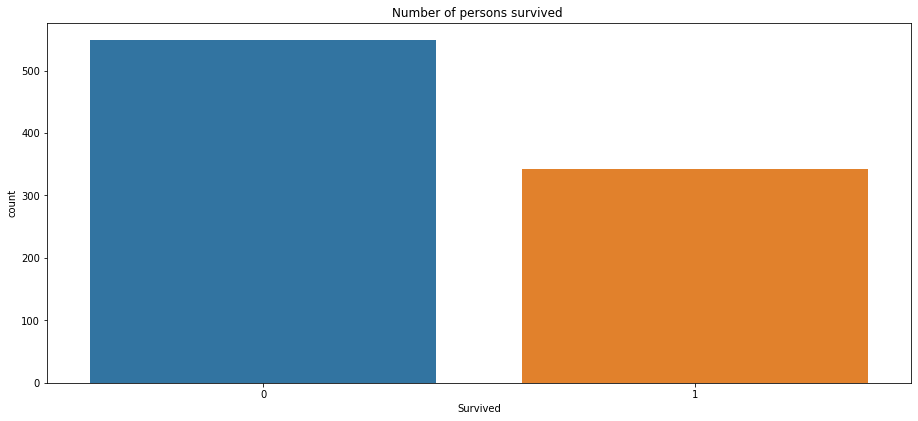

In [6]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='Survived', data=train, ax=ax)
plt.tight_layout()
plt.title('Number of persons survived ')
plt.show()

From the above obtained barplot we observe that the value count of suvived is less than not survived numbers.

## Visual EDA for single Categorical Column: "Embarked"

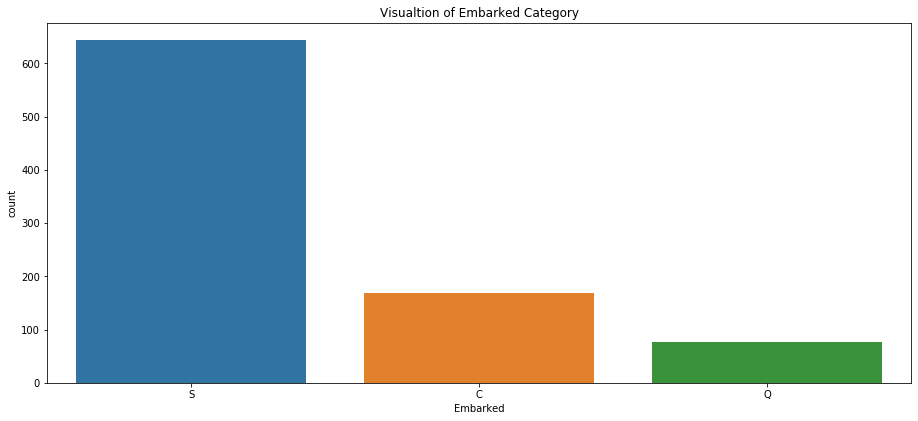

In [7]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='Embarked', data=train, ax=ax)
plt.tight_layout()
plt.title('Visualtion of Embarked Category')
plt.show()

There are more number of persons came from southampton where as the passengers travelled from cherbourg and queenston are less

## Visual EDA for single Continuous Column: "Fare" using Distribution Plot

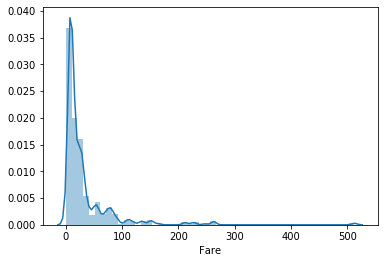

In [8]:
sns.distplot(train['Fare'])

From the above distribution plot we observe that more number passengers paying the fare of 0-100 are high.

## Visual EDA for single Continuous Column: "Fare" using KDE(Kernel Density Estimation) Plot

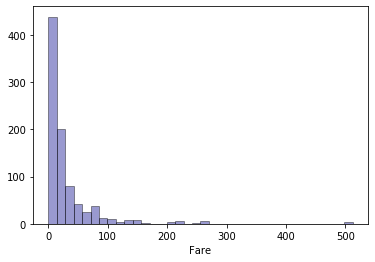

In [9]:
sns.distplot(train['Fare'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

For observing the values carefully we use Kernal density estimation plot.

# Bivariate EDA:

##  What is the count of Males and Females Survived and Not Survived in each Class?

In [10]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

We observe there are 577 male and 314 female passengers are travelled in the ship.

## Visualize Survived and Not Survived with respect to the 'Embarked' Column:

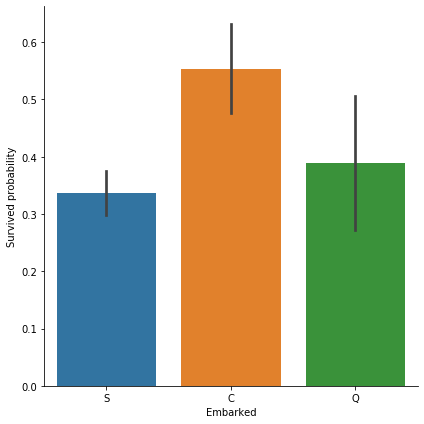

In [11]:
g = sns.factorplot(x = "Embarked", y = "Survived", data = train, kind = "bar", size = 6)
g.set_ylabels("Survived probability")
plt.show()

From the above obtained bar plot we observe that the passengers travelled from cherbourg has more probabilty for survived compared to other countries.

## Plot a Density Graph based on Fare and Survival Rate:

In [12]:
df_final = train

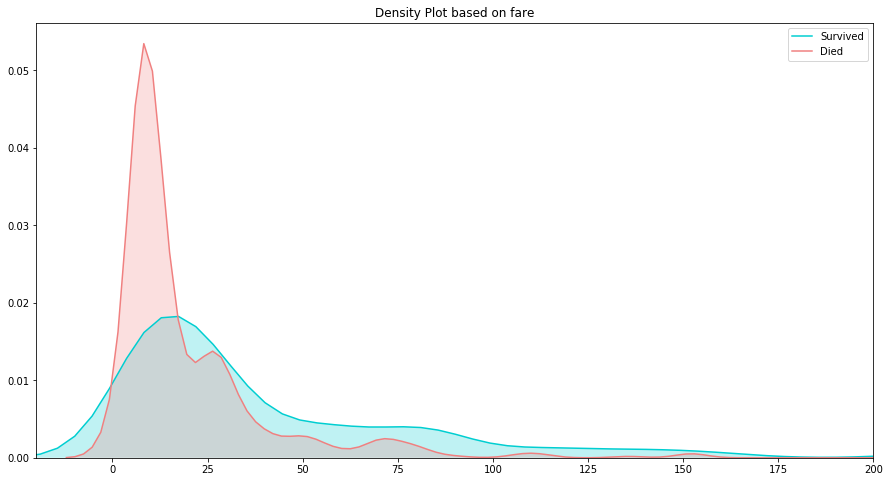

In [13]:

plt.figure(figsize=(15,8))
sns.kdeplot(df_final["Fare"][train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_final["Fare"][train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot based on fare')
# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,200)
plt.show()

From the above obtained density plot we observe that the percentage of death for the passengers who travelled with low amount of fare is high compared to the passengers travelled with high amount of fare for better understanding we plot distribution plot.

## Plot a Distplot based on Fare and Survival Rate:

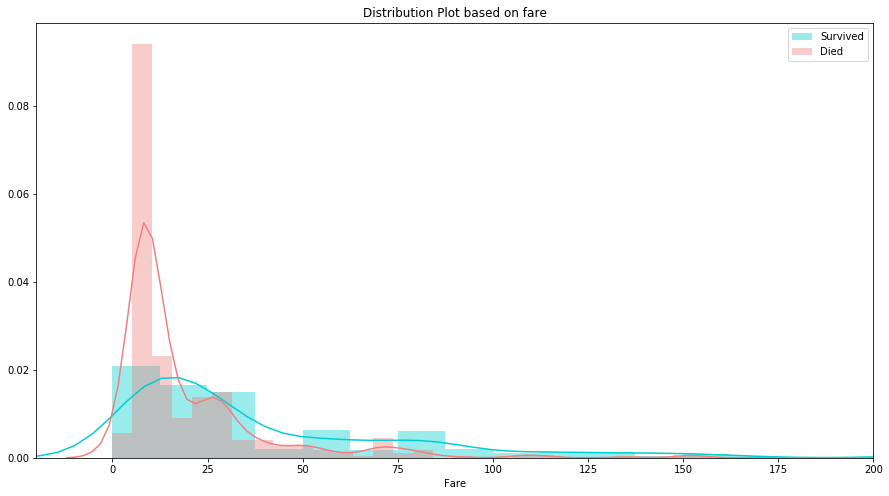

In [14]:
plt.figure(figsize=(15,8))
sns.distplot(df_final["Fare"][train.Survived == 1], color="darkturquoise")
sns.distplot(df_final["Fare"][train.Survived == 0], color="lightcoral")
plt.legend(['Survived', 'Died'])
plt.title('Distribution Plot based on fare')
# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,200)
plt.show()

From the above obtained distribution plot we get the clear picture on the survival rate based on fare.

## Survivalence based on class:-

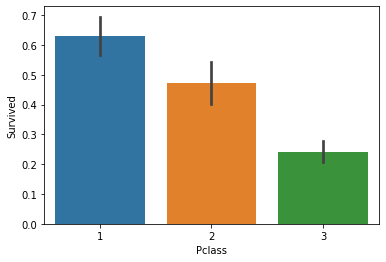

In [45]:
sns.barplot(train['Pclass'],train['Survived'])

The passengers who are in class1  has higher probabilty  of survival.

## How are "Age" and "Fare" Columns related? Plot a Graph for the same:

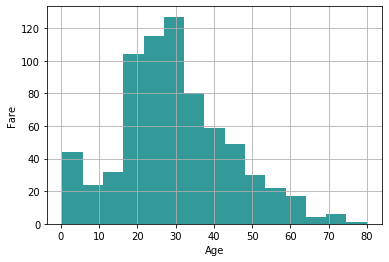

In [15]:
ax = train["Age"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='Age', ylabel='Fare')
plt.show()

The above diagram gives us an idea that the age group of ~18-32 has paid more fare amount compared to other age groups

## Survival based on age:-

In [40]:
train['Age'] = pd.cut(train['Age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])
train['Age'].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age, dtype: category
Categories (3, object): [Child < Adult < Elder]

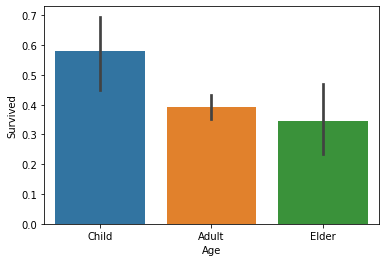

In [42]:
sns.barplot(train['Age'],train['Survived'])

Based on above obtained barplot we observe the percentage survivalence of children is high compared to other generations.

# Multivariate EDA:

## Does Age have an impact on Survival Rate for each Sex and Class group?

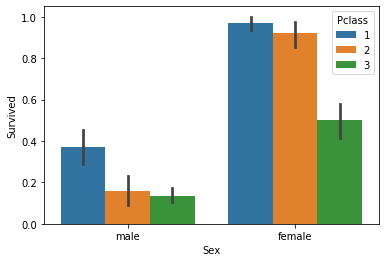

In [31]:
# Plot
sns.barplot(train['Sex'], train['Survived'], train['Pclass']);



From the above obtained barplot we observe following points:-
* The survival rate of female passengers is higher than male passengers.
* Based on the class we observe that the passengers  who are present in pclass_1 has high survival rate.

## Plot a HEATMAP showing the correlations between different features:

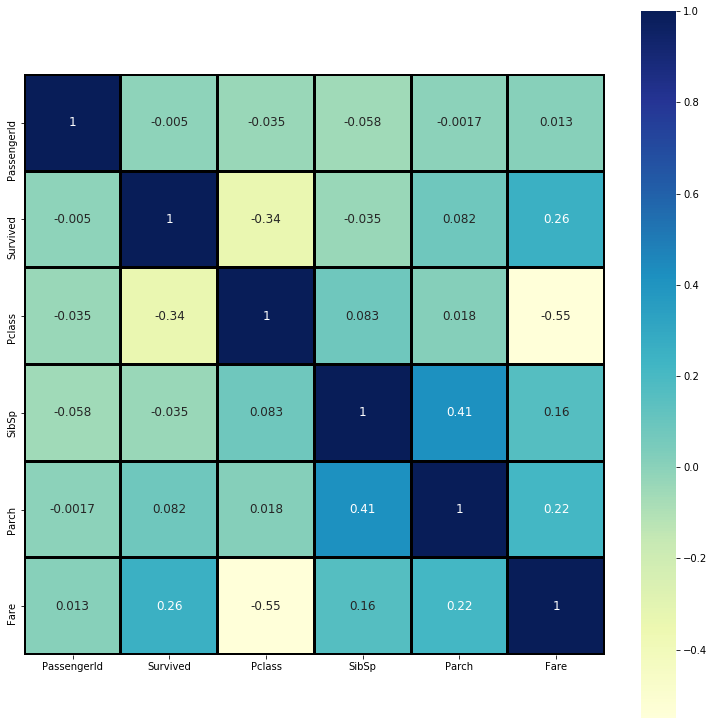

In [44]:
fig, axs = plt.subplots(nrows=1, figsize=(13, 13))
sns.heatmap(train.corr(), annot=True, square=True, cmap='YlGnBu', linewidths=2, linecolor='black', annot_kws={'size':12})

From the above obtained heat map we observe the following points:-
    * passenger id is not playing any role in our dataset.
    * Survived is highly corelalated to fare amount
    * sibsp is highly corelated to parch.

# Conclusion

**Based on the above analysis we can conclude it by describing it in following points:-**
  * The passengers who are travelling in class1 has high percentage of survival.
  * The percentage of death of female passengers is low.
  * Based on embarked we observe that the passengers who are travelling from cherbourg has high survival rate.
  * The Survival probabilty of children is high compared to other age groups.